# Fluorescence analysis
### Adrien Poindron, mai 2025.

Analysis of fluorescence files retrieved from the TAC (SR620). I use this setup for tickle experiments. Adapt it.

In [ ]:
# from PyQt5 import QtCore, QtGui, QtWidgets

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
from datetime import date

from scipy.optimize import curve_fit
from scipy.signal import argrelextrema, argrelmin, find_peaks, sosfiltfilt, butter
import os

import sys
# sys.path.append("../Functions")
sys.path.append("../../Functions")

import fit_functions as ff
from calcium_constants import *

import tkinter as tk
from tkinter import filedialog
def load_file_GUI(dir_string):
    root = tk.Tk()
    root.withdraw()
    file_path = filedialog.askopenfilename(initialdir = dir_string,
                                       multiple=True)
    return file_path

from matplotlib.pyplot import cm
matplotlib.rcParams['figure.figsize'] = [11.7, 8.3]
matplotlib.rcParams.update({'font.size': 28})

In [ ]:
from sympy import symbols, diff, solve, Eq, pi, N, lambdify

In [ ]:
# Trapping equations
def f_beta(a,q,beta_guess):
    return q**2/( (beta_guess+2)**2 - a - q**2/( (beta_guess+4)**2 - a - q**2/( (beta_guess+6)**2 - a - q**2/( (beta_guess+8)**2 - a - q**2/( (beta_guess+10)**2 - a - q**2/( (beta_guess+10)**2 - a - q**2/( (beta_guess+12)**2 - a ) ) ) ) ) ) )
def beta_continue_alamano(a,q,beta_guess): #a l'air ok
    return a + f_beta(a,q,beta_guess) + f_beta(a,q,-beta_guess)

def beta_nonadia(a_x,q_x):
    beta_guess = 0.3
    for i in range(20):
        beta_guess = beta_continue_alamano(a_x,q_x,beta_guess)
        beta_guess = np.sqrt(beta_guess)
    return beta_guess

def secular_frequency_radial(a_x,q_x):
    beta_guess = beta_nonadia(a_x,q_x)
    omega_r_2 = ( beta_guess*Omega/2 )**2
    omega_x_2 = omega_r_2 + 0.5*omega_z_2
    return omega_r_2, omega_x_2

In [ ]:
# date of today
today = date.today()
date_today = today.strftime("%y%m%d")
print(date_today)
# print(os.getcwd())
workdir = os.path.join(os.getcwd(),'XP','TAC_Measurements',date_today)
print(workdir)

In [ ]:
file_name = load_file_GUI('/Users/adrien/Documents/XP/240207')

params_name = [x for x in file_name if '.txt' in x]
fluo_name   = [x for x in file_name if '.dat' in x]

file_name = file_name[::-1]

params_name = params_name[::-1]
fluo_name   = fluo_name[::-1]

In [ ]:
fluo_name

# ['/Users/adrien/Documents/XP/TAC/250519/tkl_0.025Vpp_417.0kHz_427.0kHz_0.1ms_000010Sa_014.dat',
#  '/Users/adrien/Documents/XP/TAC/250519/tkl_0.025Vpp_427.0kHz_417.0kHz_0.1ms_000010Sa_012.dat']

In [ ]:
params = [] # Vtickle, fstart, fend, meantime, meannumber, h, bins
fluo   = []
for i,j in enumerate(fluo_name):
    with open(params_name[i], 'r') as f:
        params.append( f.readlines() )
    # params.append( np.loadtxt(params_name[i]) )
    fluo.append( np.loadtxt(fluo_name[i]) )

for i,j in enumerate(fluo_name):
    print(f'> {i:02d} : {j[38:-4]:>35s} >>>  {float(params[i][3]):.03f} ms, {float(params[i][4]):.03f} x {float(params[i][5]):.03f} Sa')

In [ ]:
# tkl_0.025Vpp_417.0kHz_427.0kHz_0.1ms_000010Sa_014 
# tkl_0.025Vpp_427.0kHz_417.0kHz_0.1ms_000010Sa_012

In [ ]:
%matplotlib qt

# Plot fluo vs freq

In [ ]:
to_plot = 0 # 10
print(fluo_name[to_plot])

figname = f'tickle_fluo_{to_plot:02d}'
fig = plt.figure(num=figname,clear=True)
ax = plt.subplot(111)

frequency = np.linspace(float(params[to_plot][11]) - float(params[to_plot][12]), float(params[to_plot][11]) + float(params[to_plot][12]), int(params[to_plot][2]))
# plt.plot(timelist,meanlist,color="xkcd:purplish blue",marker = "P",linestyle=":",label="Fluorescence")
ax.plot(frequency,fluo[to_plot],color="xkcd:purplish blue",marker = "P",linestyle=":",label="Fluorescence")

# sos = butter(4, 0.1, output='sos')
# ax.plot(frequency,sosfiltfilt(sos, fluo[to_plot]),color="k",marker = "P",linestyle=":",label="Fluorescence")

# plt.xlabel("time t (ms)")
ax.set_xlabel("$f_{tickle}$ (kHz)")
ax.set_ylabel(f"(counts/{params[to_plot][3]} ms)")
# plt.title("PMT Signal Distributions.")

# ax.set_xlim(390,490)
ax.grid()
plt.tight_layout()
# plt.savefig(f'{figname}.png',dpi=300)

print(f'{frequency[np.argmin(fluo[to_plot])]:.2f} kHz')

0 0
422301.20 Hz
1 1
421016.06 Hz


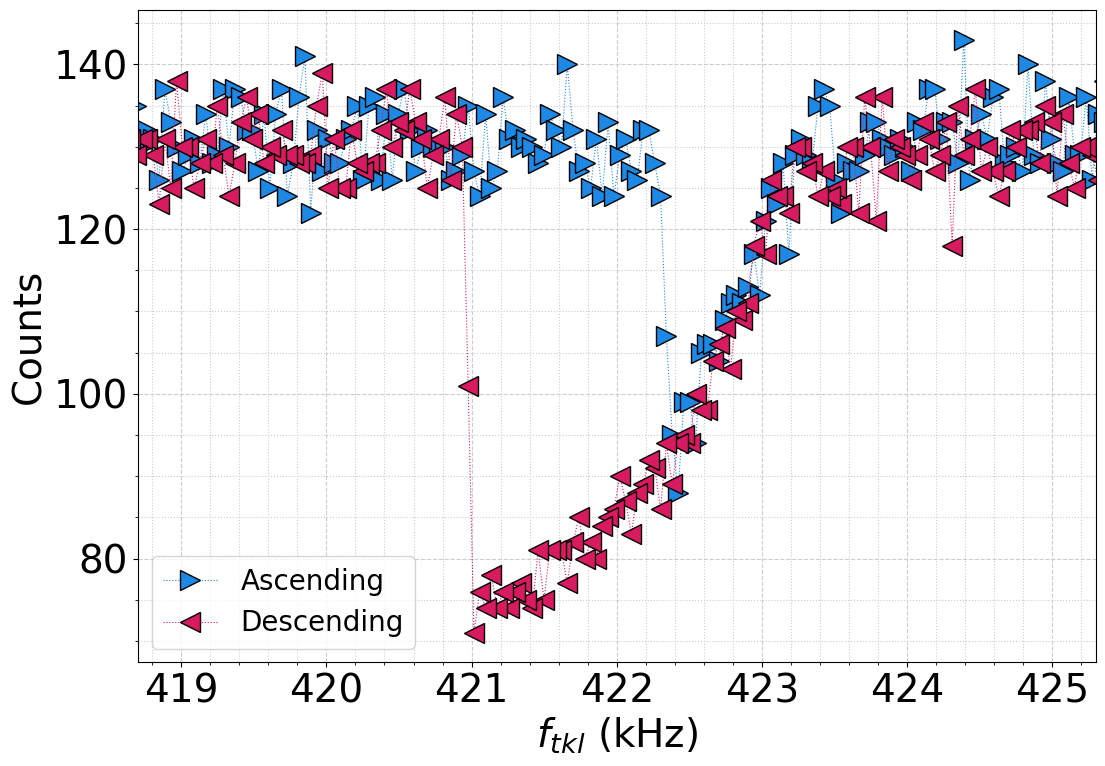

In [654]:
# to_plot = [1,4,5]
to_plot = [0,1]
my_color = ['#1E88E5','#D81B60','#FFC107']
my_markers = ['>', '<']
# my_markers = ['4', '3']
my_legend = ['Ascending', 'Descending']

figname = f'tickle_fluo_all'
fig = plt.figure(num=figname,clear=True)
ax = plt.subplot(111)

color = iter(cm.turbo(np.linspace(0, 1, len(to_plot))))
for i,j in enumerate(to_plot):
    print(i,j)
    frequency = np.linspace(float(params[i][11]) - float(params[i][12]), float(params[i][11]) + float(params[i][12]), int(params[i][2]))[::(-1)**i]
    # plt.plot(timelist,meanlist,color="xkcd:purplish blue",marker = "P",linestyle=":",label="Fluorescence")
    ax.plot(frequency*1e-3 ,fluo[j],
                color=my_color[i],
                marker = my_markers[i],ms=15,mec='k',mew=1,
                linestyle=":",lw=0.8,
                label=f'{my_legend[i]}')
    
    # ax.plot(frequency[:-1]*1e-3 ,np.diff(fluo[j]),
    #             color=my_color[i],
    #             marker = '.',
    #             linestyle=":",lw=0.5,
    #             label=f'{my_legend[i]}')
    
    # sos = butter(2, 0.05, output='sos')
    # ax.plot(frequency[::(-1)**i]*1e-3,sosfiltfilt(sos, fluo[i]),
    #         color=my_color,marker = "P",linestyle=":",label="Fluorescence")
    # print(params[j][3])

    # print the frequency of max of diff
    print(f'{frequency[85:200][np.argmax(np.abs(np.diff(fluo[j][85:200])))]:.2f} Hz')

# plt.xlabel("time t (ms)")
ax.set_xlabel("$f_{tkl}$ (kHz)")
# ax.set_ylabel(f"Counts (/{float(params[j][3])} ms)")
ax.set_ylabel(f"Counts")
# plt.title("PMT Signal Distributions.")

ax.set_xlim(418.7,425.3)
ax.legend(fontsize=20)

# Change major ticks to show every 20.
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_major_locator(MultipleLocator(20))

# Change minor ticks to show every 5. (20/4 = 5)
ax.xaxis.set_minor_locator(AutoMinorLocator(5))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))

ax.grid(which='major', color='#CCCCCC', linestyle='--')
ax.grid(which='minor', color='#CCCCCC', linestyle=':')

plt.tight_layout()
plt.savefig(f'{figname}.pdf', format='pdf', dpi=300)

In [424]:
print(np.diff(frequency))

[-40.16064257 -40.16064257 -40.16064257 -40.16064257 -40.16064257
 -40.16064257 -40.16064257 -40.16064257 -40.16064257 -40.16064257
 -40.16064257 -40.16064257 -40.16064257 -40.16064257 -40.16064257
 -40.16064257 -40.16064257 -40.16064257 -40.16064257 -40.16064257
 -40.16064257 -40.16064257 -40.16064257 -40.16064257 -40.16064257
 -40.16064257 -40.16064257 -40.16064257 -40.16064257 -40.16064257
 -40.16064257 -40.16064257 -40.16064257 -40.16064257 -40.16064257
 -40.16064257 -40.16064257 -40.16064257 -40.16064257 -40.16064257
 -40.16064257 -40.16064257 -40.16064257 -40.16064257 -40.16064257
 -40.16064257 -40.16064257 -40.16064257 -40.16064257 -40.16064257
 -40.16064257 -40.16064257 -40.16064257 -40.16064257 -40.16064257
 -40.16064257 -40.16064257 -40.16064257 -40.16064257 -40.16064257
 -40.16064257 -40.16064257 -40.16064257 -40.16064257 -40.16064257
 -40.16064257 -40.16064257 -40.16064257 -40.16064257 -40.16064257
 -40.16064257 -40.16064257 -40.16064257 -40.16064257 -40.16064257
 -40.16064

In [596]:
# Bot X/Y : 501/517 
# Top X/Y : 553/612 
a_m = np.sqrt((501-553)**2 + (517-612)**2) *8/11.9 *1e-6 /2

# 530 577 / 520 557
a_b = np.sqrt((530-520)**2 + (577-557)**2) *8/11.9 *1e-6 /2 * 1.25

omega_m = 421016.06*2*np.pi
omega_b = 422301.20*2*np.pi

omega_twopoint = (a_m**2*omega_b - 3*a_b**2*omega_m)/(a_m**2 - 3*a_b**2)

print(a_m)
print(a_b)
print(omega_twopoint/2/np.pi)

3.640353204953884e-05
9.395243602940294e-06
422622.1341120375


In [597]:
omega_est = 422500*2*np.pi

sigma_m = (omega_m - omega_est)
# a_m = 72.8*1e-6

alpha = 8*omega_est*sigma_m/(3*a_m**2)

print(alpha)

-4.980632264737016e+19


In [598]:
omega_est = 422500*2*np.pi

sigma_b = (omega_b - omega_est)
# a_m = 72.8*1e-6

alpha = 8*omega_est*sigma_b/(9*a_b**2)

print(alpha)

-3.3391368423327433e+19


In [599]:
sigma_m = (omega_m - omega_twopoint)
sigma_b = (omega_b - omega_twopoint)

alpha_twopoint = 8*omega_twopoint*(sigma_m - sigma_b)/(3*a_m**2 - 9*a_b**2)

print(alpha_twopoint)

-5.392116209510902e+19


In [600]:
omega_twopoint/2/np.pi,alpha_twopoint

(422622.1341120375, -5.392116209510902e+19)

In [601]:
# Déclaration des variables symboliques
gamma, k, mu = symbols('gamma k mu')

# Constantes numériques
alpha = alpha_twopoint
omega_0 = omega_twopoint

# Couples (a, sigma)
a1 = a_m
sigma1 = sigma_m

a2 = a_b # 15.0e-6 /2
sigma2 = sigma_b

# a3 = a1
# a3 = a1

# μ exprimé en fonction de γ
# mu_expr = -(3 * gamma * omega_0**2 * a3**2) / 8

# Équation 1
eq1 = Eq(
    (sigma1 - 3/8*alpha/omega_0*a1**2)**2 + (mu)**2,
    1/4*k**2/(a1**2*omega_0**2)
)

# Équation 2
eq2 = Eq(
    (sigma2 - 3/8*alpha/omega_0*a2**2)**2 + (mu)**2,
    1/4*k**2/(a2**2*omega_0**2)
)

# # Équation 3
# eq3 = Eq(
#     mu - 0.5*k/(omega_0*a1) + 3/8*gamma*omega_0**2*a1**2,
#     0
# )

# # Équation 3
# eq3 = Eq(
#     mu,
#     720/2
# )

# Résolution du système
solutions = solve((eq1, eq2), (k, mu), dict=False)
print(solutions)


[(-69429.2853916508, -359.117913743220), (-69429.2853916508, 359.117913743220), (69429.2853916508, -359.117913743220), (69429.2853916508, 359.117913743220)]


In [ ]:
mu_eq_solved = solutions[3][1]
print(mu_eq_solved)
# Saturation 7.023158098544676
# Detuning -8.358579585017731
mu_hypothesis = 1132.85/2
gamma_hypothesis = (mu_eq_solved - mu_hypothesis) * 8/(3*omega_0**2*a_m**2)
print(mu_hypothesis)
print(gamma_hypothesis)
k = mu_eq_solved = solutions[3][0]

359.117913743220
566.425
-0.0591604705322355


In [593]:
(69429.2853916508, 359.117913743220)
566.425
-0.0591604705322355

-0.0591604705322355

In [603]:
print(omega_0), print(omega_0/2/np.pi), print(alpha_twopoint), print(mu_hypothesis), print(gamma_hypothesis), print(k)

2655413.1835416346
422622.1341120375
-5.392116209510902e+19
566.425
-0.0591604705322355
69429.2853916508


(None, None, None, None, None, None)

In [645]:
d_offset*np.cos(np.tan(h_nw_0/z_nw_0))

-3.0881578585495376e-05

In [650]:
d_offset = 33e-6

z_nw_0 = 119e-6
h_nw_0 = 200e-6

z_nw = z_nw_0 # - d_offset*np.cos(np.tan(h_nw_0/z_nw_0))
h_nw = h_nw_0 # - d_offset*np.sin(np.tan(h_nw_0/z_nw_0))

d_nw = np.sqrt(z_nw**2 + h_nw**2)

print(z_nw*1e6, d_nw*1e6)

119.0 232.72515979154466


In [651]:
A_nw = k*m_Ca
V_nw = 5
eps = Coul_factor*C_e*1.844*1e-15*V_nw

A_piezo = A_nw / (( - eps/(d_nw**3) * (1 - 3*z_nw**2/d_nw**2) ))

print(A_nw, eps, A_piezo)
print(184.41690653263915e-9)

print(184.41690653263915e-9 / A_piezo)

4.62059425353747e-21 1.327647312031238e-23 -2.03452639261579e-8
1.8441690653263915e-07
-9.06436540720096


In [610]:
C_e

1.602176634e-19

In [197]:
# V_tkl = 50 mV

a_m = np.sqrt((507-548)**2 + (527-604)**2) *8/11.9 *1e-6 /2

f_z = 422500
omega_z = f_z*2*np.pi
sigma_m = (421016 - f_z)*2*np.pi
# a_m = 72.8*1e-6

alpha = 8*omega_z*sigma_m/(3*a_m**2)

print(a_m)
print(sigma_m)

print(alpha)

2.9322794605128584e-05
-9324.246995854506
-7.676767126899689e+19


In [198]:
# V_tkl = 25 mV

a_m = np.sqrt((501-553)**2 + (517-612)**2) *8/11.9 *1e-6 /2

f_z = 422500
omega_z = f_z*2*np.pi
sigma_m = (421000 - f_z)*2*np.pi
# a_m = 72.8*1e-6

alpha = 8*omega_z*sigma_m/(3*a_m**2)

print(a_m)
print(sigma_m)

print(alpha)

3.640353204953884e-05
-9424.77796076938
-5.034535356621765e+19


In [199]:
# V_tkl = 25 mV

a_m = np.sqrt((507-546)**2 + (526-604)**2) *8/11.9 *1e-6 /2

f_z = 422500
omega_z = f_z*2*np.pi
sigma_m = (421016 - f_z)*2*np.pi
# a_m = 58.6*1e-6

alpha = 8*omega_z*sigma_m/(3*a_m**2)

print(a_m)
print(sigma_m)

print(alpha)

2.931316004117371e-05
-9324.246995854506
-7.681814311072537e+19


# Uncertainty estimates (Maximum error)

### $\omega_0$ and $\alpha$

Computed with two points from tickle + camera

In [555]:
# Déclaration des variables symboliques
a, a_1, a_2,\
omega_00, omega_1, omega_2,\
sigma,\
alpha,\
mu_prime, mu, gamma,\
Delta_a, Delta_a_1, Delta_a_2,\
Delta_omega_0, Delta_omega_1, Delta_omega_2,\
Delta_sigma,\
Delta_alpha,\
Delta_mu_prime, Delta_mu, Delta_gamma =\
symbols('a a_1 a_2 omega_00 omega_1 omega_2 sigma alpha mu_prime mu gamma Delta_a Delta_a_1 Delta_a_2 Delta_omega_0 Delta_omega_1 Delta_omega_2 Delta_sigma Delta_alpha Delta_mu_prime Delta_mu Delta_gamma')

In [556]:
5*8/11.9

3.361344537815126

In [557]:
# Uncertainty on omega_0 computed with two points (tickle)

omega_0_f = (a_1**2*omega_2 - 3*a_2**2*omega_1)/(a_1**2 - 3*a_2**2)

# Delta_a_1 = 5e-6
# Delta_a_2 = 5e-6
# Delta_omega_1 = 5e-6
# Delta_omega_2 = 5e-6

d_omega_0 = lambdify((a_1, a_2, omega_1, omega_2, Delta_a_1, Delta_a_2, Delta_omega_1, Delta_omega_2),
                     np.abs( diff(omega_0_f,a_1) )*Delta_a_1 + np.abs( diff(omega_0_f,a_2) )*Delta_a_2 + np.abs( diff(omega_0_f,omega_1) )*Delta_omega_1 + np.abs( diff(omega_0_f,omega_2) )*Delta_omega_2 )
d_omega_0 = d_omega_0(a_m, a_b, omega_m, omega_b, 3.361344537815126e-6, 3.361344537815126e-6, 40/2*2*np.pi, 40/2*2*np.pi)
print(d_omega_0)
print(d_omega_0/2/np.pi)

2457.017991985898
391.0465586902785


In [558]:
# Uncertainty on alpha computed with two points (tickle)

alpha_f = 8*omega_00*(omega_1 - omega_2)/(3*a_1**2 - 9*a_2**2)

# Delta_a_1 = 5e-6
# Delta_a_2 = 5e-6
# Delta_omega_1 = 5e-6
# Delta_omega_2 = 5e-6

d_alpha = lambdify((a_1, a_2, omega_00, omega_1, omega_2, Delta_a_1, Delta_a_2, Delta_omega_0, Delta_omega_1, Delta_omega_2),
                   np.abs(diff(alpha_f,a_1) )*Delta_a_1 + np.abs(diff(alpha_f,a_2) )*Delta_a_2 + np.abs(diff(alpha_f,omega_00) )*Delta_omega_0 + np.abs(diff(alpha_f,omega_1) )*Delta_omega_1 + np.abs(diff(alpha_f,omega_2) )*Delta_omega_2 )
d_alpha = d_alpha(a_m, a_b, omega_twopoint, omega_m, omega_b, 3.361344537815126e-6, 3.361344537815126e-6, d_omega_0, 40/2*2*np.pi , 40/2*2*np.pi)
print(d_alpha)

2.3807763512611226e+19


### Laser uncertainty

intensity, detuning and $\mu$ and $\gamma$

In [559]:
lam_397 = 396.959060e-9
P397 = 35.8e-6
w397 = 120e-6

k397 = 2*np.pi/lam_397 # wavenumber
f_397 = c_light/lam_397  # laser frequency
detuning = (f_397 - f_397_Wan)*2*np.pi - 1.2063060743547747*Gamma_SP # detuning
intensity = 4*P397/(np.pi*w397**2)
# satI = 2*hbar*math.pi**2*c_light/(3*lam_397**3)*Gamma_SP
satI = hbar*(2*np.pi*f_397)**3/(12*np.pi*c_light**2)*Gamma_SP # sat intensity
sat0 = intensity/satI


Rs_0 = 1/(1+sat0+4*(detuning/Gamma_SP)**2)
K_Rs_0 = Rs_0                                                   * Gamma_SP/2*sat0
K_Rs_1 = + 8 /Gamma_SP**2*detuning * Rs_0**2 * k397   * Gamma_SP/2*sat0
K_Rs_2 = - 4/Gamma_SP**2 * (sat0-12/Gamma_SP**2*detuning**2+1) * Rs_0**3 * k397**2                      * Gamma_SP/2*sat0
K_Rs_3 = - 4*16/Gamma_SP**4 * detuning * (sat0+1 - 4/Gamma_SP**2*detuning**2) * Rs_0**4 * k397**3  * Gamma_SP/2*sat0

beta  = -K_Rs_1 # no unit
mu_laser = beta * hbar*k397/m_Ca /2 # linear damping
gamma_laser = K_Rs_3 * hbar*k397/m_Ca # non-linear damping

In [560]:
mu_laser, gamma_laser

(563.9610698822574, -0.40421880413811734)

In [561]:
P397_f, w397_f,\
Delta_P397_f, Delta_w397_f,\
detuning_f, Rs_0_f, Rs_0_f2, sat0_f,\
Delta_detuning, Delta_Rs_0_f, Delta_Rs_0_f2, Delta_sat0 = symbols('P397_f w397_f Delta_P397 Delta_w397 detuning_f Rs_0_f Rs_0_f2 sat0_f Delta_detuning Delta_Rs_0_f Delta_Rs_0_f2 Delta_sat0')

In [562]:
# Uncertainty on laser detuning
d_f_397 = f_397 - c_light/(lam_397+2e-15)
print(d_f_397)
print(d_f_397/Gamma_SP)

3805040.25
0.028075612631020916


In [563]:
# Uncertainty on laser intensity

intensity_f = 4*P397_f/(np.pi*w397_f**2)

d_intensity_f = lambdify((P397_f, w397_f, Delta_P397_f, Delta_w397_f),
                   np.abs(diff(intensity_f,P397_f))*Delta_P397_f + np.abs(diff(intensity_f,w397_f))*Delta_w397_f )
d_intensity_f = d_intensity_f(P397, w397, 5e-6, 10e-6)
print(d_intensity_f)
print(d_intensity_f/satI)

969.6662273561772
2.1514143523474845


In [564]:
# Uncertainty on Rs_0

Rs_0_f = 1/(1+sat0_f+4*(detuning_f/Gamma_SP)**2)

d_Rs_0_f = lambdify((detuning_f, sat0_f, Delta_detuning, Delta_sat0),
                   np.abs(diff(Rs_0_f,detuning_f))*Delta_detuning + np.abs(diff(Rs_0_f,sat0_f))*Delta_sat0 )
d_Rs_0_f = d_Rs_0_f(detuning, sat0, d_f_397, d_intensity_f/satI)
print(d_Rs_0_f)

4.8746086918271785e-05


In [565]:
# Uncertainty on mu

K_Rs_1_f = + 8 /Gamma_SP**2*detuning_f * Rs_0_f2**2 * k397   * Gamma_SP/2*sat0_f

d_K_Rs_1_f = lambdify((detuning_f, Rs_0_f2, sat0_f, Delta_detuning, Delta_Rs_0_f2, Delta_sat0),
                   np.abs(diff(K_Rs_1_f,detuning_f))*Delta_detuning + np.abs(diff(K_Rs_1_f,Rs_0_f2))*Delta_Rs_0_f2 + np.abs(diff(K_Rs_1_f,sat0_f))*Delta_sat0 )
d_K_Rs_1_f = d_K_Rs_1_f(detuning, Rs_0, sat0, d_f_397, d_Rs_0_f, d_intensity_f/satI)
print(d_K_Rs_1_f)
d_mu = d_K_Rs_1_f * hbar*k397/m_Ca /2
print(d_mu)

15187.218239234782
190.45983801061146


In [566]:
# Uncertainty on gamma

d_gamma = 8/3/(omega_0**2*a_m**2) * d_mu
print(d_gamma)

0.05435266993355185


### Drive uncertainrty

k

In [573]:
# Uncertainty on k

k_f = 2*omega_00*a * ((sigma - 3/8*alpha/omega_00*a**2)**2 + (mu_prime)**2)**0.5

# Delta_a_1 = 5e-6
# Delta_a_2 = 5e-6
# Delta_omega_1 = 5e-6
# Delta_omega_2 = 5e-6

d_k = lambdify((a, omega_00, sigma, alpha, mu_prime, Delta_a, Delta_omega_0, Delta_sigma, Delta_alpha, Delta_mu_prime),
                   np.abs(diff(k_f,a))*Delta_a + np.abs(diff(k_f,omega_00))*Delta_omega_0 + np.abs(diff(k_f,sigma))*Delta_sigma + np.abs(diff(k_f,alpha))*Delta_alpha + np.abs(diff(k_f,mu_prime))*Delta_mu_prime )
d_k = d_k(a_m, omega_twopoint, omega_m - omega_twopoint, alpha_twopoint, mu_eq_solved, 3.361344537815126e-6, d_omega_0, d_omega_0, d_alpha, d_mu)
print(d_k)

43297.1825779014


In [568]:
3751.3830688459466
597.0511588380764

4.102541038202567e+18
190.45983801061146

0.05435266993355185

19202.7063200375

19202.7063200375

In [572]:
print(d_omega_0),print(d_omega_0/2/np.pi), print(d_alpha), print(d_mu), print(d_gamma), print(d_k)

2457.017991985898
391.0465586902785
2.3807763512611226e+19
190.45983801061146
0.05435266993355185
46422.4473898976


(None, None, None, None, None, None)

# Uncertainty estimates (Standard error)

### $\omega_0$ and $\alpha$

Computed with two points from tickle + camera

In [575]:
# Déclaration des variables symboliques
a, a_1, a_2,\
omega_00, omega_1, omega_2,\
sigma,\
alpha,\
mu_prime, mu, gamma,\
Delta_a, Delta_a_1, Delta_a_2,\
Delta_omega_0, Delta_omega_1, Delta_omega_2,\
Delta_sigma,\
Delta_alpha,\
Delta_mu_prime, Delta_mu, Delta_gamma =\
symbols('a a_1 a_2 omega_00 omega_1 omega_2 sigma alpha mu_prime mu gamma Delta_a Delta_a_1 Delta_a_2 Delta_omega_0 Delta_omega_1 Delta_omega_2 Delta_sigma Delta_alpha Delta_mu_prime Delta_mu Delta_gamma')

In [576]:
# Uncertainty on omega_0 computed with two points (tickle)

omega_0_f = (a_1**2*omega_2 - 3*a_2**2*omega_1)/(a_1**2 - 3*a_2**2)

# Delta_a_1 = 5e-6
# Delta_a_2 = 5e-6
# Delta_omega_1 = 5e-6
# Delta_omega_2 = 5e-6

d_omega_0 = lambdify((a_1, a_2, omega_1, omega_2, Delta_a_1, Delta_a_2, Delta_omega_1, Delta_omega_2),
                    (diff(omega_0_f,a_1)*Delta_a_1)**2 + (diff(omega_0_f,a_2)*Delta_a_2)**2 + (diff(omega_0_f,omega_1)*Delta_omega_1)**2 + (diff(omega_0_f,omega_2)*Delta_omega_2)**2 )
d_omega_0 = np.sqrt(d_omega_0(a_m, a_b, omega_m, omega_b, 3.361344537815126e-6/np.sqrt(3), 3.361344537815126e-6/np.sqrt(3), 40/2*2*np.pi/np.sqrt(3), 40/2*2*np.pi/np.sqrt(3)))
print(d_omega_0)
print(d_omega_0/2/np.pi)

1079.1646481149503
171.75438815752017


In [577]:
# Uncertainty on alpha computed with two points (tickle)

alpha_f = 8*omega_00*(omega_1 - omega_2)/(3*a_1**2 - 9*a_2**2)

# Delta_a_1 = 5e-6
# Delta_a_2 = 5e-6
# Delta_omega_1 = 5e-6
# Delta_omega_2 = 5e-6

d_alpha = lambdify((a_1, a_2, omega_00, omega_1, omega_2, Delta_a_1, Delta_a_2, Delta_omega_0, Delta_omega_1, Delta_omega_2),
                   (diff(alpha_f,a_1)*Delta_a_1)**2 + (diff(alpha_f,a_2)*Delta_a_2)**2 + (diff(alpha_f,omega_00)*Delta_omega_0)**2 + (diff(alpha_f,omega_1)*Delta_omega_1)**2 + (diff(alpha_f,omega_2)*Delta_omega_2)**2 )
d_alpha = np.sqrt(d_alpha(a_m, a_b, omega_twopoint, omega_m, omega_b, 3.361344537815126e-6/np.sqrt(3), 3.361344537815126e-6/np.sqrt(3), d_omega_0/np.sqrt(3), 40/2*2*np.pi/np.sqrt(3), 40/2*2*np.pi/np.sqrt(3)))
print(d_alpha)

9.112417887787878e+18


### Laser uncertainty

intensity, detuning and $\mu$ and $\gamma$

In [578]:
lam_397 = 396.959060e-9
P397 = 35.8e-6
w397 = 120e-6

k397 = 2*np.pi/lam_397 # wavenumber
f_397 = c_light/lam_397  # laser frequency
detuning = (f_397 - f_397_Wan)*2*np.pi - 1.2063060743547747*Gamma_SP # detuning
intensity = 4*P397/(np.pi*w397**2)
# satI = 2*hbar*math.pi**2*c_light/(3*lam_397**3)*Gamma_SP
satI = hbar*(2*np.pi*f_397)**3/(12*np.pi*c_light**2)*Gamma_SP # sat intensity
sat0 = intensity/satI


Rs_0 = 1/(1+sat0+4*(detuning/Gamma_SP)**2)
K_Rs_0 = Rs_0                                                   * Gamma_SP/2*sat0
K_Rs_1 = + 8 /Gamma_SP**2*detuning * Rs_0**2 * k397   * Gamma_SP/2*sat0
K_Rs_2 = - 4/Gamma_SP**2 * (sat0-12/Gamma_SP**2*detuning**2+1) * Rs_0**3 * k397**2                      * Gamma_SP/2*sat0
K_Rs_3 = - 4*16/Gamma_SP**4 * detuning * (sat0+1 - 4/Gamma_SP**2*detuning**2) * Rs_0**4 * k397**3  * Gamma_SP/2*sat0

beta  = -K_Rs_1 # no unit
mu_laser = beta * hbar*k397/m_Ca /2 # linear damping
gamma_laser = K_Rs_3 * hbar*k397/m_Ca # non-linear damping

In [579]:
mu_laser, gamma_laser

(563.9610698822574, -0.40421880413811734)

In [580]:
P397_f, w397_f,\
Delta_P397_f, Delta_w397_f,\
detuning_f, Rs_0_f, Rs_0_f2, sat0_f,\
Delta_detuning, Delta_Rs_0_f, Delta_Rs_0_f2, Delta_sat0 = symbols('P397_f w397_f Delta_P397 Delta_w397 detuning_f Rs_0_f Rs_0_f2 sat0_f Delta_detuning Delta_Rs_0_f Delta_Rs_0_f2 Delta_sat0')

In [581]:
# Uncertainty on laser detuning
d_f_397 = f_397 - c_light/(lam_397+2e-15)
print(d_f_397)
print(d_f_397/Gamma_SP)

3805040.25
0.028075612631020916


In [582]:
# Uncertainty on laser intensity

intensity_f = 4*P397_f/(np.pi*w397_f**2)

d_intensity_f = lambdify((P397_f, w397_f, Delta_P397_f, Delta_w397_f),
                   (diff(intensity_f,P397_f)*Delta_P397_f)**2 + (diff(intensity_f,w397_f)*Delta_w397_f)**2 )
d_intensity_f = np.sqrt(d_intensity_f(P397, w397, 3.361344537815126e-6/np.sqrt(3), 10e-6/np.sqrt(3)))
print(d_intensity_f)
print(d_intensity_f/satI)

349.60066877770913
0.7756647340903711


In [583]:
# Uncertainty on Rs_0

Rs_0_f = 1/(1+sat0_f+4*(detuning_f/Gamma_SP)**2)

d_Rs_0_f = lambdify((detuning_f, sat0_f, Delta_detuning, Delta_sat0),
                   (diff(Rs_0_f,detuning_f)*Delta_detuning)**2 + (diff(Rs_0_f,sat0_f)*Delta_sat0)**2 )
d_Rs_0_f = np.sqrt(d_Rs_0_f(detuning, sat0, d_f_397/np.sqrt(3), d_intensity_f/satI))
print(d_Rs_0_f)

1.612679662249032e-05


In [584]:
# Uncertainty on mu

K_Rs_1_f = + 8 /Gamma_SP**2*detuning_f * Rs_0_f2**2 * k397   * Gamma_SP/2*sat0_f

d_K_Rs_1_f = lambdify((detuning_f, Rs_0_f2, sat0_f, Delta_detuning, Delta_Rs_0_f2, Delta_sat0),
                   (diff(K_Rs_1_f,detuning_f)*Delta_detuning)**2 + (diff(K_Rs_1_f,Rs_0_f2)*Delta_Rs_0_f2)**2 + (diff(K_Rs_1_f,sat0_f)*Delta_sat0)**2 )
d_K_Rs_1_f = np.sqrt(d_K_Rs_1_f(detuning, Rs_0, sat0, d_f_397, d_Rs_0_f, d_intensity_f/satI))
print(d_K_Rs_1_f)
d_mu = d_K_Rs_1_f * hbar*k397/m_Ca /2
print(d_mu)

4986.434667339126
62.533870523991304


In [587]:
# Uncertainty on gamma

d_gamma = 8/3/(omega_0**2*a_m**2) * d_mu
print(d_gamma)

0.01784566688578512


### Drive uncertainrty

k

In [588]:
# Uncertainty on k

k_f = 2*omega_00*a * ((sigma - 3/8*alpha/omega_00*a**2)**2 + (mu_prime)**2)**0.5

# Delta_a_1 = 5e-6
# Delta_a_2 = 5e-6
# Delta_omega_1 = 5e-6
# Delta_omega_2 = 5e-6

d_k = lambdify((a, omega_00, sigma, alpha, mu_prime, Delta_a, Delta_omega_0, Delta_sigma, Delta_alpha, Delta_mu_prime),
                   (diff(k_f,a)*Delta_a)**2 + (diff(k_f,omega_00)*Delta_omega_0)**2 + (diff(k_f,sigma)*Delta_sigma)**2 + (diff(k_f,alpha)*Delta_alpha)**2 + (diff(k_f,mu_prime)*Delta_mu_prime)**2 )
d_k = (d_k(a_m, omega_twopoint, omega_m - omega_twopoint, alpha_twopoint, mu_eq_solved, 3.361344537815126e-6/np.sqrt(3), d_omega_0, d_omega_0, d_alpha, d_mu))
print(d_k**0.5)

12643.7627105918


In [589]:
print(d_omega_0), print(d_omega_0/2/np.pi), print(d_alpha), print(d_mu), print(d_gamma), print(d_k**0.5)

1079.1646481149503
171.75438815752017
9.112417887787878e+18
62.533870523991304
0.01784566688578512
12643.7627105918


(None, None, None, None, None, None)

# Compare errors